In [6]:
import env
import os
import wrangle as w
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")
# Array and Dataframes
import numpy as np
import pandas as pd
# Imputer
from sklearn.impute import SimpleImputer
# Evaluation: Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Evaluation: Statistical Analysis
from scipy import stats
# Modeling: Scaling
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
# Modeling
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import GridSearchCV
# Metrics
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
zillow = w.zillow()

File exists, pulling from system.


In [4]:
train, validate, test = w.splitter(zillow)

Dataframe: (2140235, 7) 100%
Train: (1369750, 7) | ~60%
Validate: (342438, 7) | ~20%
Test: (428047, 7) | ~20%


In [8]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,county
353297,4,2.0,1834,520117,1969,5998.36,Orange
1185246,3,2.0,1694,378680,1949,4730.96,LA
452922,4,3.0,2295,432768,1978,5433.90,Ventura
163875,3,2.0,2182,393305,1969,4879.33,LA
27042,4,2.0,2187,131101,1945,1741.01,LA


In [17]:
x_train = train[['calculatedfinishedsquarefeet']]
y_train = train['taxvaluedollarcnt']
x_validate = validate[['calculatedfinishedsquarefeet']]
y_validate = validate['taxvaluedollarcnt']
x_test = test[['calculatedfinishedsquarefeet']]
y_test = test['taxvaluedollarcnt']


In [18]:
model = lr().fit(x_train, y_train)
predictions = model.predict(x_train)

In [33]:
baseline = x_train.mean().round(2)
baseline

calculatedfinishedsquarefeet    1863.39
dtype: float64

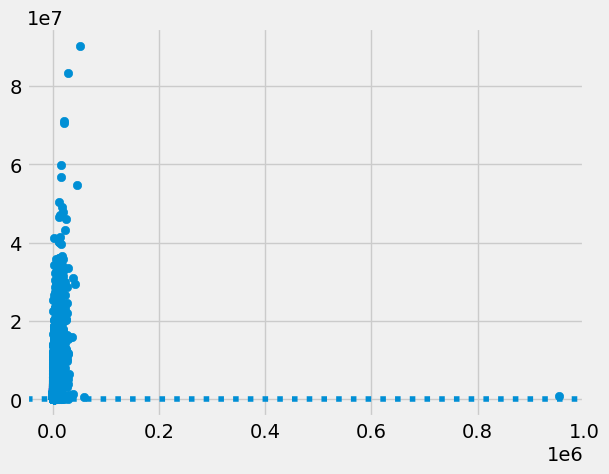

In [40]:
plt.scatter(x_train, y_train)
plt.axhline([[baseline]], ls=':')